# Customer Lifetime Value Prediction

##### **Objective:**  Predict the lifetime value of customers for a business based on their historical interactions.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### We'll go through 9 steps in this project.
#### **Step 1:** Generate general insights on the data
#### **Step 2:** Exploratory Data Analysis (EDA)
#### **Step 3:** Data Cleaning
#### **Step 4:** Feature Engineering
#### **Step 5:** Handling Categorical Data
#### **Step 6:** Data Normalization and Standardization
#### **Step 7:** Data Splitting into Training and Testing sets
#### **Step 8:** Model Training and evaluation
#### **Step 9:** Saving the model


---


##### Let's start with importing necessary libraries and reading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1:** Reading the data and generating general insights

In [ ]:
clv_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Internships/CodeClause/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
clv_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
clv_df.shape          #to check how many rows and columns do we have

(9134, 24)

In [ ]:
clv_df.info()         # to get an overview of the data such

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

##### some of the data types can be corrected, which will be done in the cleaning step

In [ ]:
clv_df.isnull().sum()     # to check if there is any missing values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

## **Step 2:** Exploratory Data Analysis (EDA)
##### Insights to explore:
- Distribution of the Customer Lifetime Value
- Correlation between numerical values


- What are the mean, median, standard deviation, minimum, and maximum values?

In [ ]:
clv_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


- What is the distribution of the data?

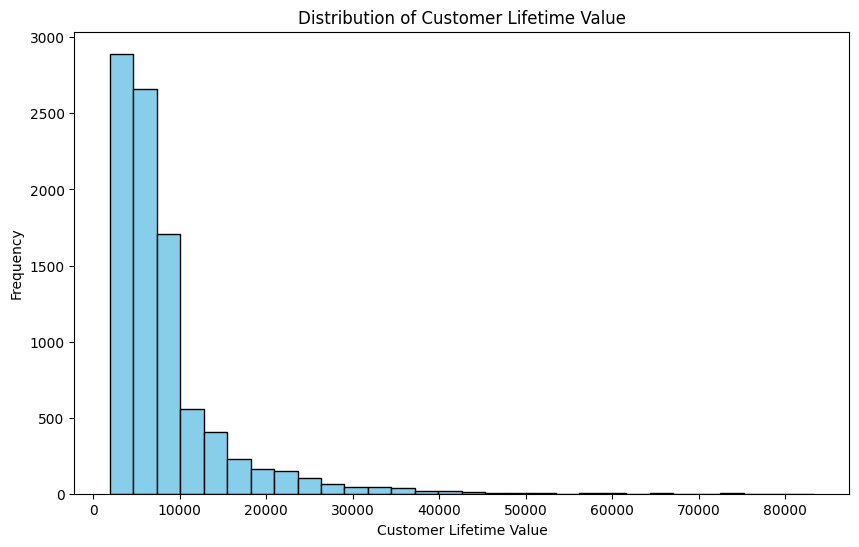

In [ ]:
# Histogram for 'Customer Lifetime Value'

plt.figure(figsize=(10,6))
plt.hist(clv_df['Customer Lifetime Value'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Lifetime Value')
plt.show()

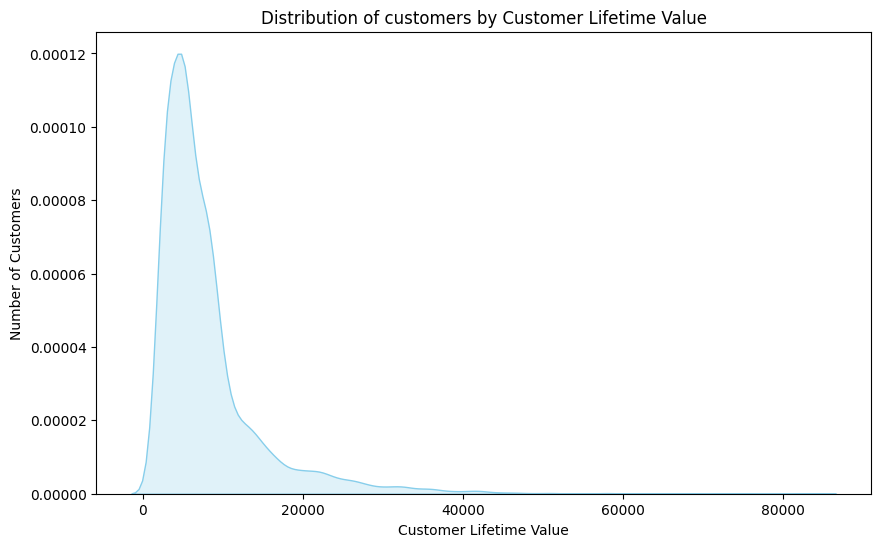

In [ ]:
# KDE plot for 'Customer Lifetime Value'

plt.figure(figsize=(10,6))
sns.kdeplot(clv_df['Customer Lifetime Value'], fill=True,color='skyblue')
# sns.histplot(clv_df['Customer Lifetime Value'],bins=50, kde=True,color='skyblue')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by Customer Lifetime Value')
plt.show()

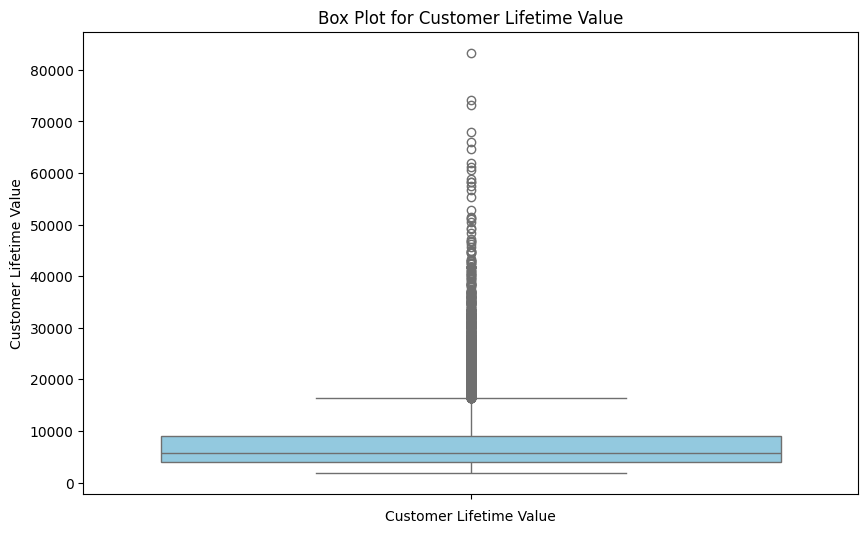

In [ ]:
# Box plot for 'Customer Lifetime Value'

plt.figure(figsize=(10,6))
sns.boxplot(clv_df['Customer Lifetime Value'], color='skyblue')
plt.xlabel('Customer Lifetime Value')
plt.title('Box Plot for Customer Lifetime Value')
plt.show()

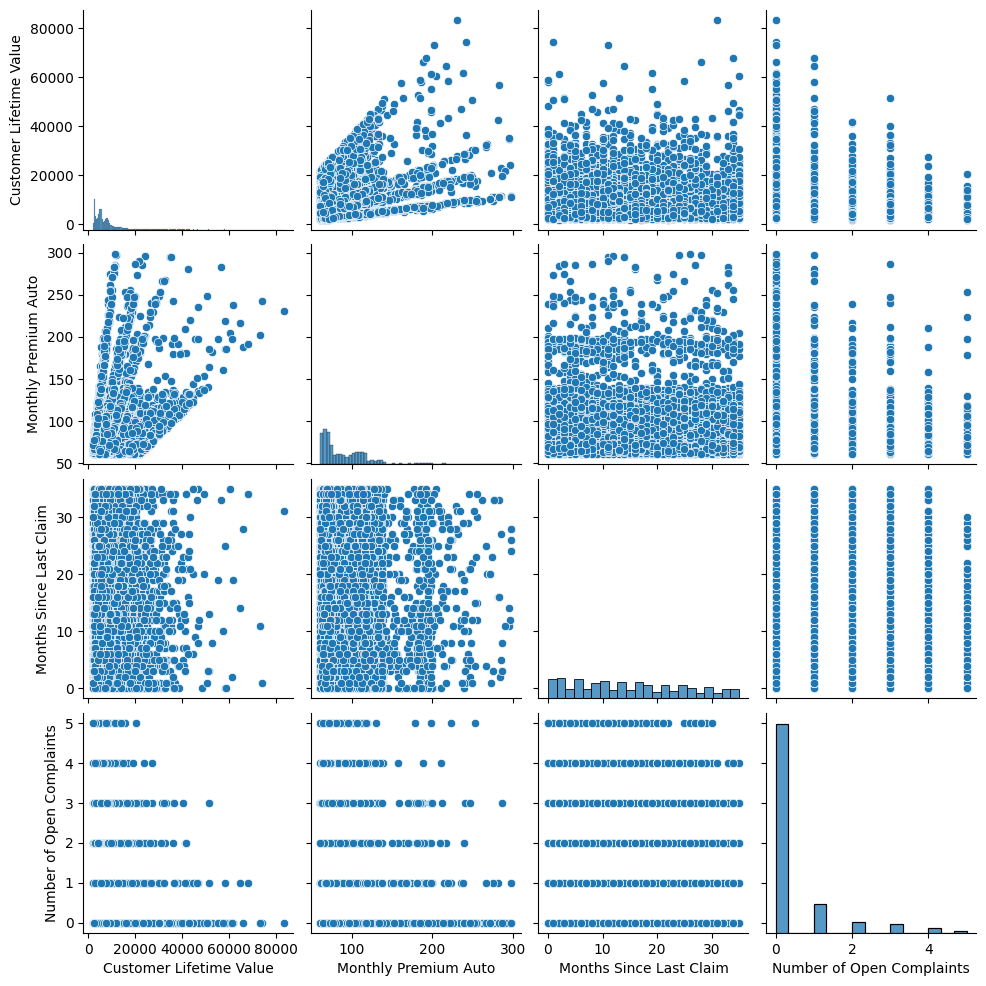

In [ ]:
# Pair Plot for selected features

selected_features = ['Customer Lifetime Value','Monthly Premium Auto','Months Since Last Claim','Number of Open Complaints']
sns.pairplot(clv_df[selected_features])
plt.show()

- What is the distribution of customers by Income?

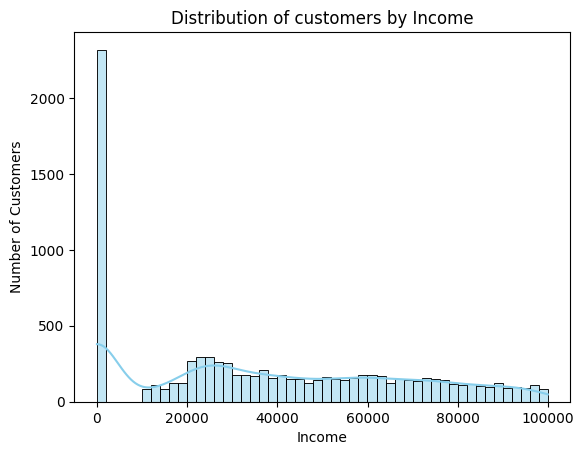

In [ ]:
sns.histplot(clv_df['Income'],bins=50,kde=True,color='skyblue')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by Income')
plt.show()

- Which state has the highest and lowest number of customers?

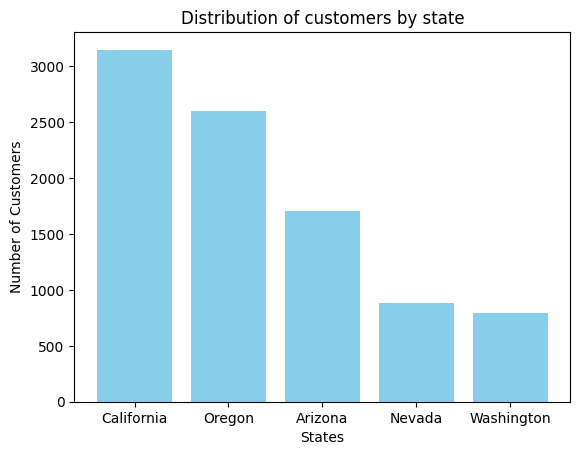

In [ ]:
plt.bar(clv_df['State'].value_counts().index,clv_df['State'].value_counts(),color='skyblue')
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by state')
plt.show()

- What is the distribution of customers by gender?

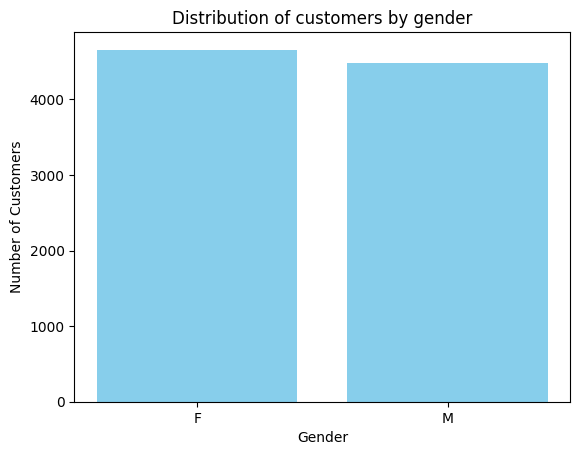

In [ ]:
plt.bar(clv_df['Gender'].value_counts().index,clv_df['Gender'].value_counts(),color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by gender')
plt.show()

- What is the distribution of the data by education?

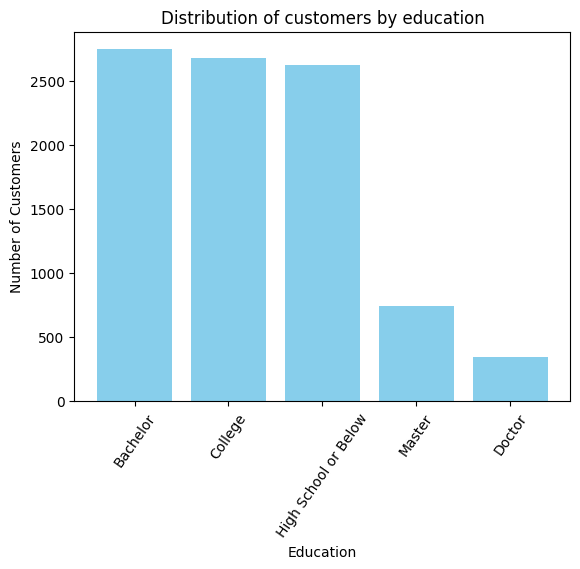

In [ ]:
plt.bar(clv_df['Education'].value_counts().index,
        clv_df['Education'].value_counts(),
        color='skyblue')
plt.xlabel('Education')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by education')
plt.xticks(rotation=55)
plt.show()

- What is the distribution of the customers by Employment Status?

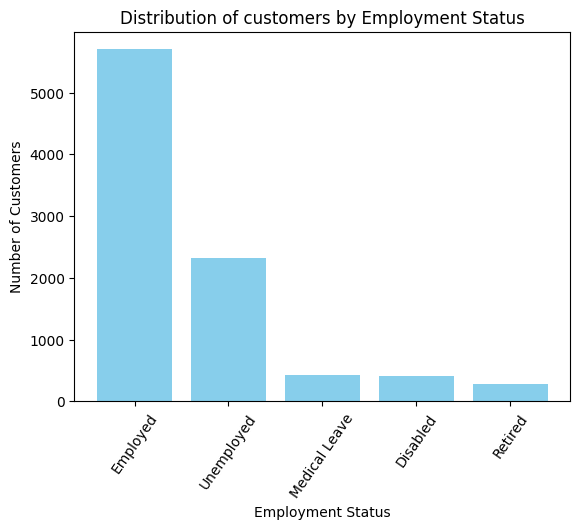

In [ ]:
plt.bar(clv_df['EmploymentStatus'].value_counts().index,
        clv_df['EmploymentStatus'].value_counts(),
        color='skyblue')
plt.xlabel('Employment Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by Employment Status')
plt.xticks(rotation=55)
plt.show()

- What is the distribution of the data by Sales Channel?

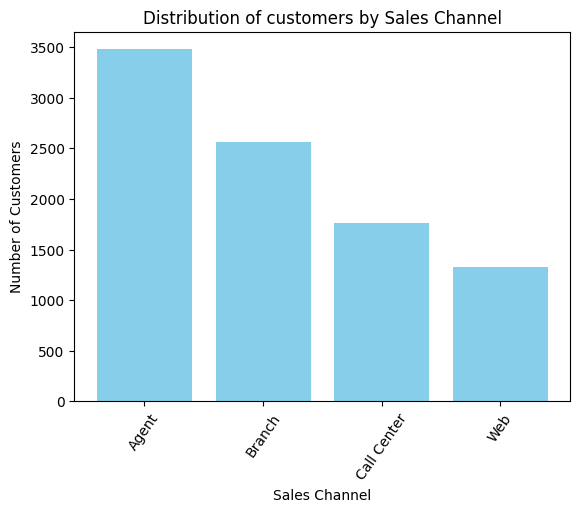

In [ ]:
plt.bar(clv_df['Sales Channel'].value_counts().index,
        clv_df['Sales Channel'].value_counts(),
        color='skyblue')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by Sales Channel')
plt.xticks(rotation=55)
plt.show()

- What is the distribution of the data by vehicle class and vehicle type?

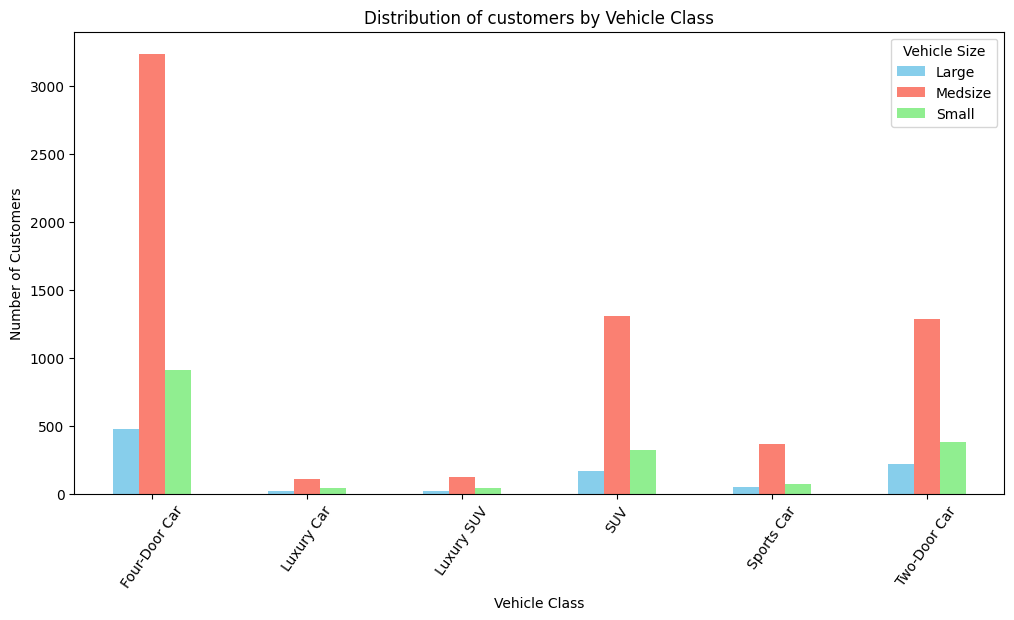

In [ ]:
# Group by both Vehicle Class and Vehicle Size and get the counts
Vehicle_counts = clv_df.groupby(['Vehicle Class','Vehicle Size']).size().unstack()

# Plot the stacked bar chart
Vehicle_counts.plot(kind='bar',figsize=(12,6),color=('skyblue','salmon','lightgreen'))
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by Vehicle Class')
plt.xticks(rotation=55)
plt.show()

- What is the distribution of customers by number of complaints?

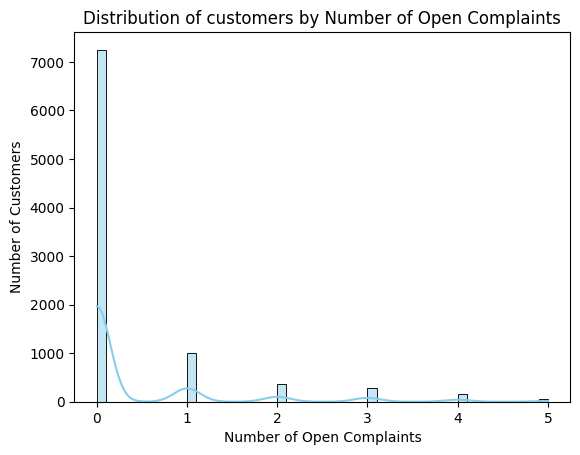

In [ ]:
sns.histplot(clv_df['Number of Open Complaints'],
             bins=50,
             kde= True,
             color='skyblue')
plt.xlabel('Number of Open Complaints')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by Number of Open Complaints')
plt.show()

- What are the strongest correlations?

In [ ]:
clv_numeric_columns = clv_df.select_dtypes(include=['int64','float64'])
clv_numeric_columns.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


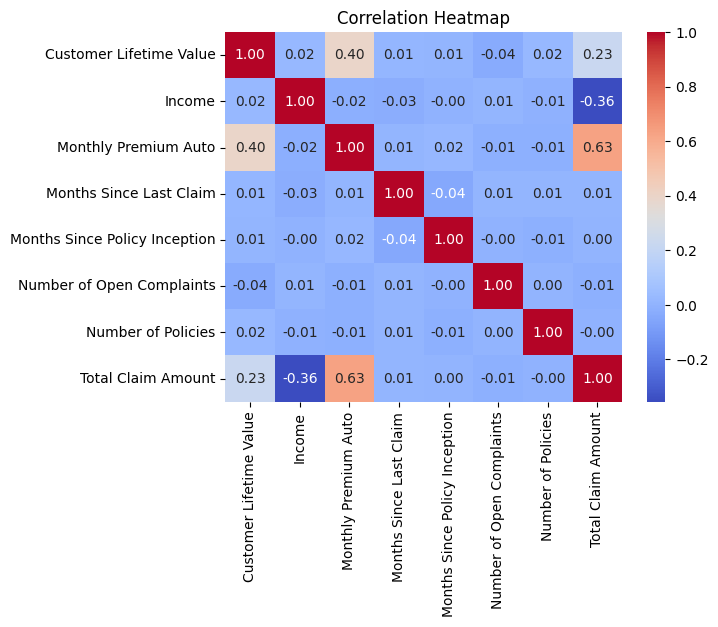

In [ ]:
sns.heatmap(clv_numeric_columns.corr(),
            annot=True,   # to show numbers in the heatmap
            fmt='.2f',    # to round the float numbers in the graph for better readability
            cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Step 3:** Data Cleaning

In [ ]:
clv_df.Response.unique()    # check the unique value in the Response columns

array(['No', 'Yes'], dtype=object)

##### since the values of the 'Response' column are yes and no, we can change them to bool 'True and False'

In [ ]:
clv_df['Response'] = clv_df['Response'].map({'Yes':'True',"No":'False'})        # to convert the Yes to true and no to false

##### now I need to convert the data type of the 'Response' column to bool

In [ ]:
clv_df['Response'] = clv_df['Response'].astype('bool')        # to convert the datatype to bool
clv_df['Response'] = clv_df['Response'].astype('int')         # to convert the datatype to int
clv_df['Response'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: Response
Non-Null Count  Dtype
--------------  -----
9134 non-null   int64
dtypes: int64(1)
memory usage: 71.5 KB


##### Let's convert the 'effective to date' column to 'datetime' datatype instead of object

In [ ]:
clv_df['Effective To Date'] = pd.to_datetime(clv_df['Effective To Date'])     # change date type to datetime
clv_df['Effective To Date'].head()

<ipython-input-126-d6d4591821eb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clv_df['Effective To Date'] = pd.to_datetime(clv_df['Effective To Date'])     # change date type to datetime


0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: Effective To Date, dtype: datetime64[ns]

##### We can then extract the date components into separate columns to make it recognizable when training the model and drop the original Date column

In [ ]:
clv_df['Year'] = clv_df['Effective To Date'].dt.year
clv_df['Month'] = clv_df['Effective To Date'].dt.month
clv_df['Day'] = clv_df['Effective To Date'].dt.day
clv_df.drop('Effective To Date', axis=1, inplace= True)
clv_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Year,Month,Day
0,BU79786,Washington,2763.519279,1,Basic,Bachelor,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,6979.535903,1,Extended,Bachelor,Unemployed,F,0,Suburban,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,12887.431650,1,Premium,Bachelor,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
3,WW63253,California,7645.861827,1,Basic,Bachelor,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20
4,HB64268,Washington,2813.692575,1,Basic,Bachelor,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,3


##### Check for any duplicates

In [ ]:
clv_df.duplicated(subset=None, keep='first').sum()

0

##### Drop the 'Customer' column since the values are unique for each record, which will affect the accuracy of the model.

In [ ]:
clv_df.drop(columns=['Customer'], axis = 1, inplace = True)

## **Step 4:** Feature Engineering

In [ ]:
# clv_df.iloc[:,10:19].head()

In [ ]:
clv_df['Average Claim Amount Per Policy'] = clv_df['Total Claim Amount'] / clv_df['Number of Policies']

clv_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Year,Month,Day,Average Claim Amount Per Policy
0,Washington,2763.519279,1,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24,384.811147
1,Arizona,6979.535903,1,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31,141.433117
2,Nevada,12887.431650,1,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19,283.236124
3,California,7645.861827,1,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20,75.697335
4,Washington,2813.692575,1,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,3,138.130879


## **Step 5:** Handeling Categorical Data

Let's inspect the data types to know which columns are we going to encode

In [ ]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            9134 non-null   object 
 1   Customer Lifetime Value          9134 non-null   float64
 2   Response                         9134 non-null   int64  
 3   Coverage                         9134 non-null   object 
 4   Education                        9134 non-null   object 
 5   EmploymentStatus                 9134 non-null   object 
 6   Gender                           9134 non-null   object 
 7   Income                           9134 non-null   int64  
 8   Location Code                    9134 non-null   object 
 9   Marital Status                   9134 non-null   object 
 10  Monthly Premium Auto             9134 non-null   int64  
 11  Months Since Last Claim          9134 non-null   int64  
 12  Months Since Policy 

##### Select all the columns of data type 'object' and insert them into a new dataframe 'categorical_df'

In [ ]:
categorical_df = clv_df.select_dtypes(include=['object'])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             9134 non-null   object
 1   Coverage          9134 non-null   object
 2   Education         9134 non-null   object
 3   EmploymentStatus  9134 non-null   object
 4   Gender            9134 non-null   object
 5   Location Code     9134 non-null   object
 6   Marital Status    9134 non-null   object
 7   Policy Type       9134 non-null   object
 8   Policy            9134 non-null   object
 9   Renew Offer Type  9134 non-null   object
 10  Sales Channel     9134 non-null   object
 11  Vehicle Class     9134 non-null   object
 12  Vehicle Size      9134 non-null   object
dtypes: object(13)
memory usage: 927.8+ KB


##### use one-hot encoding technique

In [ ]:

dummy_df = pd.get_dummies(categorical_df, drop_first=True, dtype=int)
dummy_df.info()
# clv_df = pd.concat([clv_df, dummy_df], axis=1)
# clv_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   State_California                9134 non-null   int64
 1   State_Nevada                    9134 non-null   int64
 2   State_Oregon                    9134 non-null   int64
 3   State_Washington                9134 non-null   int64
 4   Coverage_Extended               9134 non-null   int64
 5   Coverage_Premium                9134 non-null   int64
 6   Education_College               9134 non-null   int64
 7   Education_Doctor                9134 non-null   int64
 8   Education_High School or Below  9134 non-null   int64
 9   Education_Master                9134 non-null   int64
 10  EmploymentStatus_Employed       9134 non-null   int64
 11  EmploymentStatus_Medical Leave  9134 non-null   int64
 12  EmploymentStatus_Retired        9134 non-null   int64
 13  Emp

In [ ]:
clv_df.drop(categorical_df.columns, axis=1, inplace= True)    # drop the columns with object dtypes
clv_df = pd.concat([clv_df, dummy_df], axis= 1)               # concat the dummy_df to the clv_df
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer Lifetime Value          9134 non-null   float64
 1   Response                         9134 non-null   int64  
 2   Income                           9134 non-null   int64  
 3   Monthly Premium Auto             9134 non-null   int64  
 4   Months Since Last Claim          9134 non-null   int64  
 5   Months Since Policy Inception    9134 non-null   int64  
 6   Number of Open Complaints        9134 non-null   int64  
 7   Number of Policies               9134 non-null   int64  
 8   Total Claim Amount               9134 non-null   float64
 9   Year                             9134 non-null   int32  
 10  Month                            9134 non-null   int32  
 11  Day                              9134 non-null   int32  
 12  Average Claim Amount

In [ ]:
### move the column "Customer Lifetime Value" to the end since this is our label

clv_col = clv_df.pop('Customer Lifetime Value')         # pop the column
clv_df.insert(54,'Customer Lifetime Value',clv_col)     # add the column to the end of the dataframe
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Response                         9134 non-null   int64  
 1   Income                           9134 non-null   int64  
 2   Monthly Premium Auto             9134 non-null   int64  
 3   Months Since Last Claim          9134 non-null   int64  
 4   Months Since Policy Inception    9134 non-null   int64  
 5   Number of Open Complaints        9134 non-null   int64  
 6   Number of Policies               9134 non-null   int64  
 7   Total Claim Amount               9134 non-null   float64
 8   Year                             9134 non-null   int32  
 9   Month                            9134 non-null   int32  
 10  Day                              9134 non-null   int32  
 11  Average Claim Amount Per Policy  9134 non-null   float64
 12  State_California    

## **Step 6:**

### we'll check if the data is normally distributed using 2 techniuqes:
- Q-Q Plot
- Shapiro-wilk test

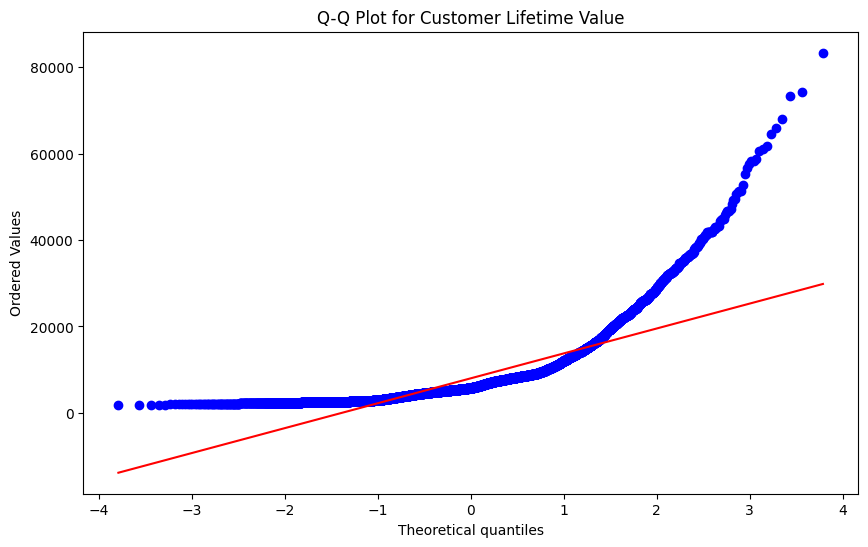

In [ ]:
# Q-Q Plot for 'Customer Lifetime Value'

import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(clv_df['Customer Lifetime Value'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Customer Lifetime Value')
plt.show()

According to the Q-Q plot, there is significant deviation from a normal distribution, and outliers in the upper tail.

In [ ]:
# Shapiro-wilk test of 'Customer Lifetime Value'

import scipy.stats as shapiro

stat, p = stats.shapiro(clv_df['Customer Lifetime Value'])
print('Statistics=%.3f, p=%.3f'% (stat, p))

if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

Statistics=0.703, p=0.000
Probably not Gaussian


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


According to Shapiro Test, the data isn't normally distributed.

### We can now use data transformation is order to make the data more normally distributed
We'll use the log transformation

In [ ]:
clv_df['clv_log'] = np.log1p(clv_df['Customer Lifetime Value'])

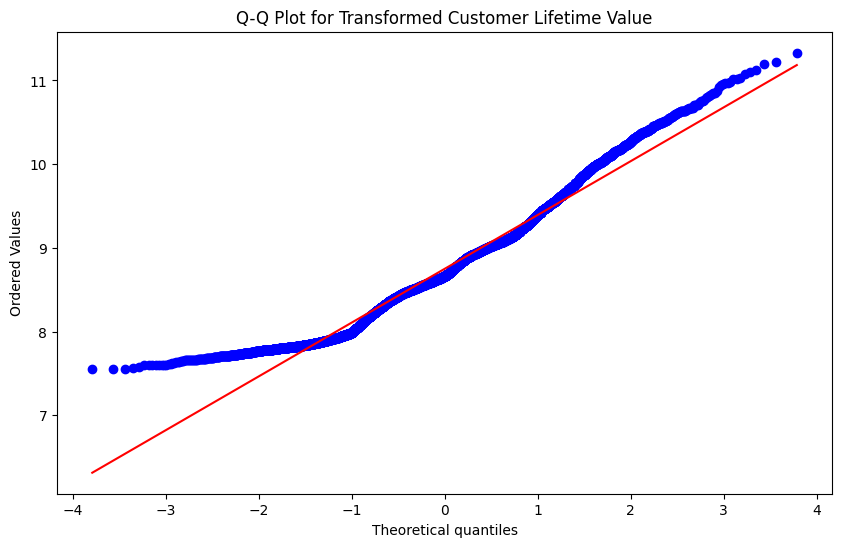

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(clv_df['clv_log'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Transformed Customer Lifetime Value')
plt.show()

In [ ]:
stat, p = stats.shapiro(clv_df['clv_log'])
print('Statistics=%.3f, p=%.3f'% (stat, p))

if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

Statistics=0.968, p=0.000
Probably not Gaussian


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


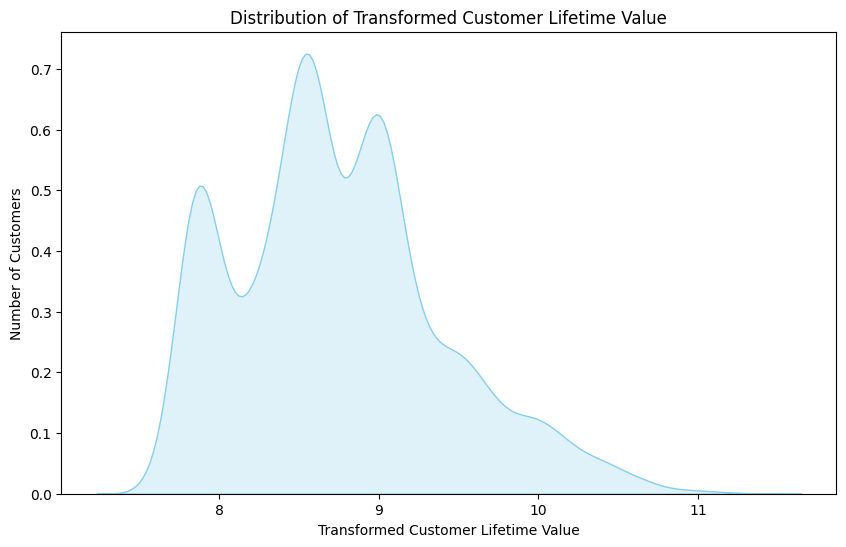

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(clv_df['clv_log'], fill=True,color='skyblue')
plt.xlabel('Transformed Customer Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of Transformed Customer Lifetime Value')
plt.show()

In [ ]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Response                         9134 non-null   int64  
 1   Income                           9134 non-null   int64  
 2   Monthly Premium Auto             9134 non-null   int64  
 3   Months Since Last Claim          9134 non-null   int64  
 4   Months Since Policy Inception    9134 non-null   int64  
 5   Number of Open Complaints        9134 non-null   int64  
 6   Number of Policies               9134 non-null   int64  
 7   Total Claim Amount               9134 non-null   float64
 8   Year                             9134 non-null   int32  
 9   Month                            9134 non-null   int32  
 10  Day                              9134 non-null   int32  
 11  Average Claim Amount Per Policy  9134 non-null   float64
 12  State_California    

## **Step 7:** Data Splitting into Training and Testing sets

In [ ]:
# let's save the original CLV and drop it from clv_df

original_clv = clv_df['Customer Lifetime Value']
clv_df.drop('Customer Lifetime Value', inplace= True, axis = 1)
clv_df.head()

KeyError: 'Customer Lifetime Value'

### We'll split the data

In [ ]:
from sklearn.model_selection import train_test_split

X = clv_df.iloc[:,:-1]
y = clv_df['clv_log']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)


## **Step 8:** Model Training

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Response                         9134 non-null   int64  
 1   Income                           9134 non-null   int64  
 2   Monthly Premium Auto             9134 non-null   int64  
 3   Months Since Last Claim          9134 non-null   int64  
 4   Months Since Policy Inception    9134 non-null   int64  
 5   Number of Open Complaints        9134 non-null   int64  
 6   Number of Policies               9134 non-null   int64  
 7   Total Claim Amount               9134 non-null   float64
 8   Year                             9134 non-null   int32  
 9   Month                            9134 non-null   int32  
 10  Day                              9134 non-null   int32  
 11  Average Claim Amount Per Policy  9134 non-null   float64
 12  State_California    

#### I'll use RandomForest since there is not linear relationship between the features and the label

In [180]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
print(rf_model.score(X_test, y_test))

# print the used parameters
print(rf_model.get_params())

0.9133860207241739
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


##### Model Evaluation using cross-validation

In [169]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(rf_model, X, y, cv=5)
print(score)
print(score.mean(), score.std())

[0.91043617 0.91523497 0.90564513 0.91581301 0.90624947]
0.9106757494507853 0.0042926521445098694


evaluate using MSE

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rf_model.predict(X_test))
print(mse)

0.03513786541754635


### Hyperparamater tuning

In [176]:
param_grid = {

    'n_estimators':[50, 100, 200],
    'max_depth':[None, 10, 20, 30],
    'max_features':[None, 'sqrt','log2']
}

In [177]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf_model, param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 200}


#### we'll update the hyperparameters

In [179]:
rf_model2= RandomForestRegressor(n_estimators = 200)
rf_model2.fit(X_train, y_train)
y_predict = rf_model2.predict(X_test)
rf_model2.score(X_test, y_test)

0.912175891509972

### There isn't a huge difference in score, so the default n_estimator is the best. we can try now RandomizedSearchCV

In [182]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'n_estimators': 100, 'max_features': None, 'max_depth': None}


##### according to the result of RandomizedSearchCV, the best parameters are the defaults, so we will stick to the first model.

## **Step 9:** Saving the model

In [ ]:
import pickle

# saving the model
saved_model = pickle.dumps(rf_model)

# loading the model
loaded_model = pickle.loads(saved_model)
